In [1]:
import numpy
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import norm

%matplotlib inline

In [2]:
data = pd.read_csv('var9.csv', delimiter=';', encoding='latin-1')

data.head()
# data.columns

,x1,x2,x3,x4
0,-0.897436,2.957325,0.813866,-2.929710
1,0.913193,-2.144254,-3.747306,0.351578
2,1.519199,2.326746,0.392555,0.960214
3,1.744936,-1.062103,-0.704699,1.935248
4,0.676578,-1.141261,-1.831863,-0.752030


1. Загрузить четырехмерную выборку из файла «varN.csv», где N – номер
варианта (номер в списке группы, упорядоченном по алфавиту). Объем выборки –
400 наблюдений. По выборке оценить вектор математического ожидания μ и
ковариационную матрицу Σ (можно использовать смещенные оценки). Оценить
коэффициенты корреляции между всеми парами переменных.

In [3]:
mean_vector = data.mean()

# Вычисление ковариационной матрицы
covariance_matrix = data.cov()

print("Средние значения (mean_vector):")
print(mean_vector)
print("\nКовариационная матрица (covariance_matrix):")
print(covariance_matrix)
correlation_matrix = data.corr()

# Вывод оценок
print("\nМатрица коэффициентов корреляции:")
print(correlation_matrix)

Средние значения (mean_vector):
x1    1.550264
x2    0.809125
x3   -1.995478
x4    1.355777
dtype: float64

Ковариационная матрица (covariance_matrix):
          x1        x2        x3         x4
x1  4.241628 -0.063526  0.209125   8.446083
x2 -0.063526  8.663032  1.462754  -0.265002
x3  0.209125  1.462754  3.217240   0.358796
x4  8.446083 -0.265002  0.358796  17.305781

Матрица коэффициентов корреляции:
          x1        x2        x3        x4
x1  1.000000 -0.010480  0.056611  0.985811
x2 -0.010480  1.000000  0.277073 -0.021643
x3  0.056611  0.277073  1.000000  0.048085
x4  0.985811 -0.021643  0.048085  1.000000


2. (1 балл). Построить гистограммы для каждой переменной из выборки.
Похожи ли гистограммы на плотность распределения нормального закона?

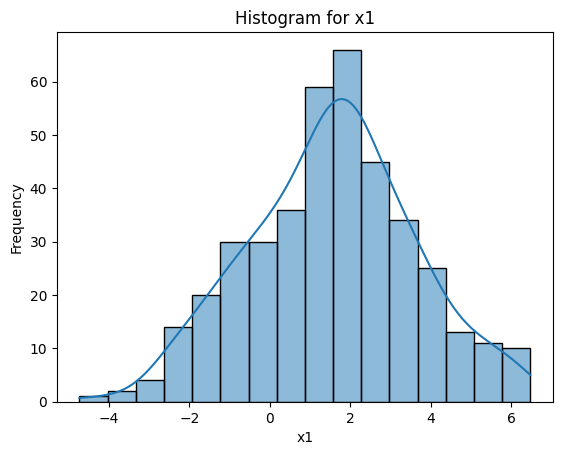

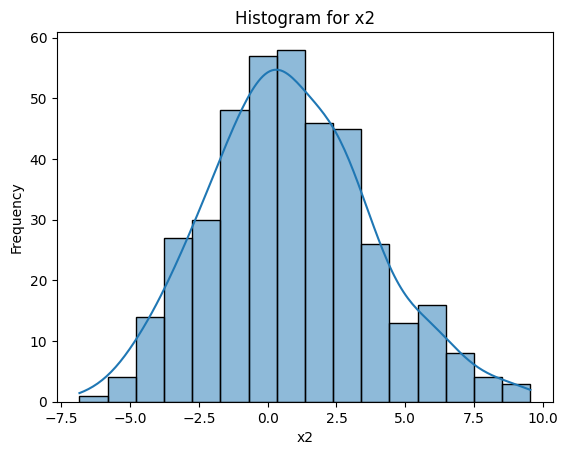

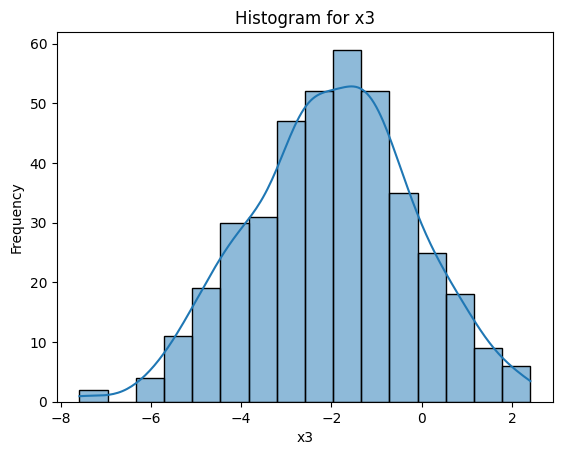

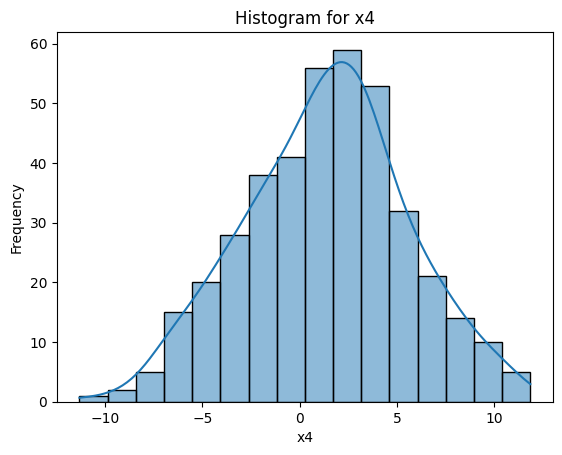

In [4]:
for column in data.columns:
    plt.figure()
    sns.histplot(data[column], kde=True)
    plt.title(f'Histogram for {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

4. (1 балл). Изобразить диаграмму рассеяния первой и второй переменной
выборки (по оси x откладывать значения X1, а по оси y – X2 или наоборот).

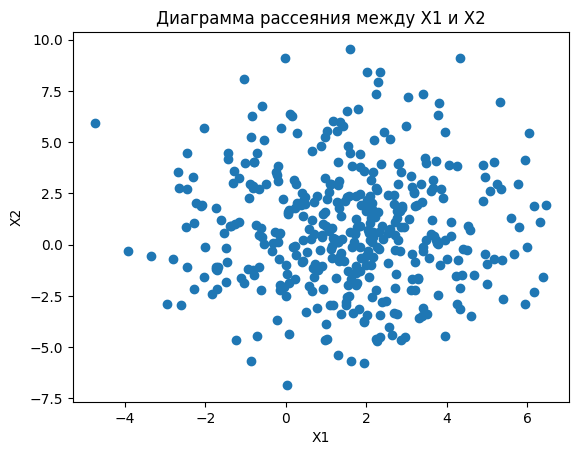

In [5]:
# Создайте диаграмму рассеяния
plt.scatter(data['x1'], data['x2'])

# Добавьте подписи к осям и заголовок
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Диаграмма рассеяния между X1 и X2')

# Покажите диаграмму
plt.show()


5. (1 балл). На том же графике изобразить несколько эллипсов концентрации –
малого, среднего и большого радиуса (эллипсоид концентрации для многомерного
нормального закона – изолиния, вдоль которой плотность распределения не
изменяется). Вместо точных значений математического ожидания и ковариационной
матрицы используйте соответствующие оценки.

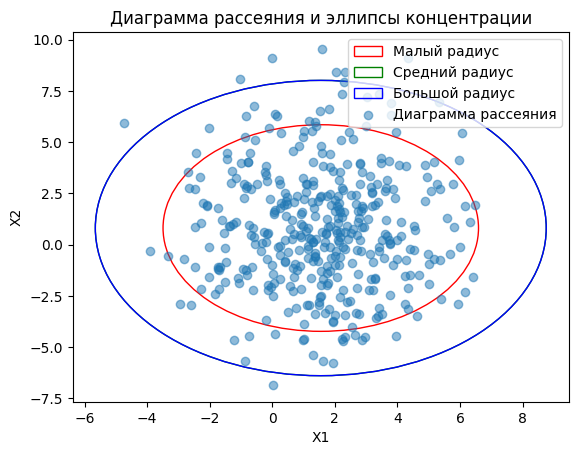

In [6]:
# Оценки математических ожиданий
mean_X1 = data['x1'].mean()
mean_X2 = data['x2'].mean()

# Оценка ковариационной матрицы
cov_matrix = data[['x1', 'x2']].cov()

# Собственные значения и собственные векторы ковариационной матрицы
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# Определение коэффициента для уровня доверия
confidence_level = 2.4477  # Значение для уровня доверия 95%

# Малый, средний и большой радиусы эллипсов
radius_small = confidence_level * np.sqrt(eigenvalues[0])
radius_large = confidence_level * np.sqrt(eigenvalues[1])

# Создаем фигуру
fig, ax = plt.subplots()

# Создаем эллипсы концентрации
ellipse_small = plt.matplotlib.patches.Ellipse((mean_X1, mean_X2), 2 * radius_small, 2 * radius_small, angle=0, fill=False, color='red', label='Малый радиус')
ellipse_medium = plt.matplotlib.patches.Ellipse((mean_X1, mean_X2), 2 * radius_large, 2 * radius_large, angle=0, fill=False, color='green', label='Средний радиус')
ellipse_large = plt.matplotlib.patches.Ellipse((mean_X1, mean_X2), 2 * radius_large, 2 * radius_large, angle=0, fill=False, color='blue', label='Большой радиус')

# Добавляем эллипсы на график
ax.add_patch(ellipse_small)
ax.add_patch(ellipse_medium)
ax.add_patch(ellipse_large)

# Создаем диаграмму рассеяния
plt.scatter(data['x1'], data['x2'], label='Диаграмма рассеяния', alpha=0.5)

# Добавляем подписи
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Диаграмма рассеяния и эллипсы концентрации')
plt.legend()

# Показываем график
plt.show()


6. (0.5 балла). Повторите шаги 4–5 для первой и третьей, первой и четвертой
переменных выборки. Как изменяются эллипсы концентрации, что можно сказать об
их форме?

1) Первая и третья переменные:

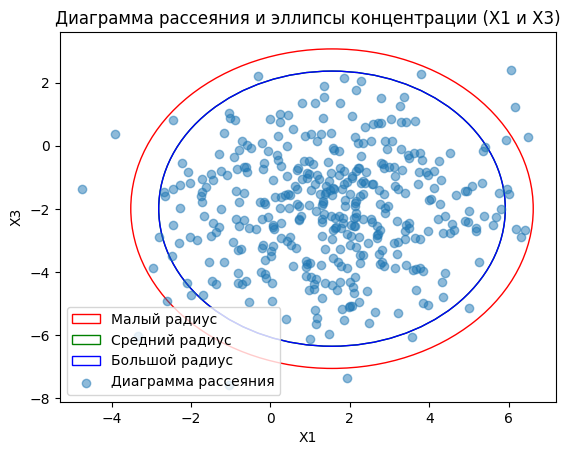

In [7]:
# Оценки математических ожиданий
mean_X1 = data['x1'].mean()
mean_X3 = data['x3'].mean()

# Оценка ковариационной матрицы
cov_matrix = data[['x1', 'x3']].cov()

# Собственные значения и собственные векторы ковариационной матрицы
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# Определение коэффициента для уровня доверия
confidence_level = 2.4477  # Значение для уровня доверия 95%

# Малый, средний и большой радиусы эллипсов
radius_small = confidence_level * np.sqrt(eigenvalues[0])
radius_large = confidence_level * np.sqrt(eigenvalues[1])

# Создаем фигуру
fig, ax = plt.subplots()

# Создаем эллипсы концентрации
ellipse_small = plt.matplotlib.patches.Ellipse((mean_X1, mean_X3), 2 * radius_small, 2 * radius_small, angle=0, fill=False, color='red', label='Малый радиус')
ellipse_medium = plt.matplotlib.patches.Ellipse((mean_X1, mean_X3), 2 * radius_large, 2 * radius_large, angle=0, fill=False, color='green', label='Средний радиус')
ellipse_large = plt.matplotlib.patches.Ellipse((mean_X1, mean_X3), 2 * radius_large, 2 * radius_large, angle=0, fill=False, color='blue', label='Большой радиус')

# Добавляем эллипсы на график
ax.add_patch(ellipse_small)
ax.add_patch(ellipse_medium)
ax.add_patch(ellipse_large)

# Создаем диаграмму рассеяния
plt.scatter(data['x1'], data['x3'], label='Диаграмма рассеяния', alpha=0.5)

# Добавляем подписи
plt.xlabel('X1')
plt.ylabel('X3')
plt.title('Диаграмма рассеяния и эллипсы концентрации (X1 и X3)')
plt.legend()

# Показываем график
plt.show()


2) Первая и четвертая переменные:

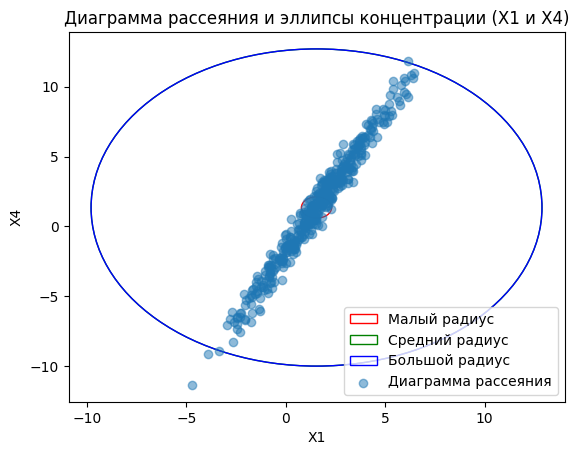

In [8]:
# Оценки математических ожиданий
mean_X1 = data['x1'].mean()
mean_X4 = data['x4'].mean()

# Оценка ковариационной матрицы
cov_matrix = data[['x1', 'x4']].cov()

# Собственные значения и собственные векторы ковариационной матрицы
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# Определение коэффициента для уровня доверия
confidence_level = 2.4477  # Значение для уровня доверия 95%

# Малый, средний и большой радиусы эллипсов
radius_small = confidence_level * np.sqrt(eigenvalues[0])
radius_large = confidence_level * np.sqrt(eigenvalues[1])

# Создаем фигуру
fig, ax = plt.subplots()

# Создаем эллипсы концентрации
ellipse_small = plt.matplotlib.patches.Ellipse((mean_X1, mean_X4), 2 * radius_small, 2 * radius_small, angle=0, fill=False, color='red', label='Малый радиус')
ellipse_medium = plt.matplotlib.patches.Ellipse((mean_X1, mean_X4), 2 * radius_large, 2 * radius_large, angle=0, fill=False, color='green', label='Средний радиус')
ellipse_large = plt.matplotlib.patches.Ellipse((mean_X1, mean_X4), 2 * radius_large, 2 * radius_large, angle=0, fill=False, color='blue', label='Большой радиус')

# Добавляем эллипсы на график
ax.add_patch(ellipse_small)
ax.add_patch(ellipse_medium)
ax.add_patch(ellipse_large)

# Создаем диаграмму рассеяния
plt.scatter(data['x1'], data['x4'], label='Диаграмма рассеяния', alpha=0.5)

# Добавляем подписи
plt.xlabel('X1')
plt.ylabel('X4')
plt.title('Диаграмма рассеяния и эллипсы концентрации (X1 и X4)')
plt.legend()

# Показываем график
plt.show()


In [9]:
from scipy.stats import shapiro, normaltest, anderson, kstest

alpha = 0.05  # Уровень значимости

for column in data.columns:
    dt = data[column]
    
    # Тест Шапиро-Уилка
    shapiro_stat, shapiro_p = shapiro(dt)
    
    # Тест Колмогорова-Смирнова
    ks_stat, ks_p = kstest(dt, 'norm')
    
    # Тест Андерсона-Дарлинга
    anderson_stat, anderson_critical_values, anderson_significance = anderson(dt, dist='norm')
    
    # Вы можете выбрать один или несколько из этих тестов, чтобы проверить нормальность распределения
    # Далее принимаем решение на основе уровня значимости alpha
    is_normal = True
    
    if shapiro_p < alpha:
        print(f'{column}: Не соответствует нормальному распределению (Shapiro-Wilk), p={shapiro_p}')
        is_normal = False
    
    if ks_p < alpha:
        print(f'{column}: Не соответствует нормальному распределению (Kolmogorov-Smirnov), p={ks_p}')
        is_normal = False
    
    if anderson_stat > anderson_critical_values[2]:
        print(f'{column}: Не соответствует нормальному распределению (Anderson-Darling), statistic={anderson_stat}')
        is_normal = False
    
    if is_normal:
        print(f'{column}: Соответствует нормальному распределению')



x1: Не соответствует нормальному распределению (Kolmogorov-Smirnov), p=1.0515945494174738e-86
x2: Не соответствует нормальному распределению (Kolmogorov-Smirnov), p=1.2856450234116617e-40
x3: Не соответствует нормальному распределению (Kolmogorov-Smirnov), p=3.063785193238278e-117
x4: Не соответствует нормальному распределению (Kolmogorov-Smirnov), p=3.9847972274077504e-72


Математическое ожидание x5: 1.0360632925021185
Дисперсия x5: 4.746617099349315


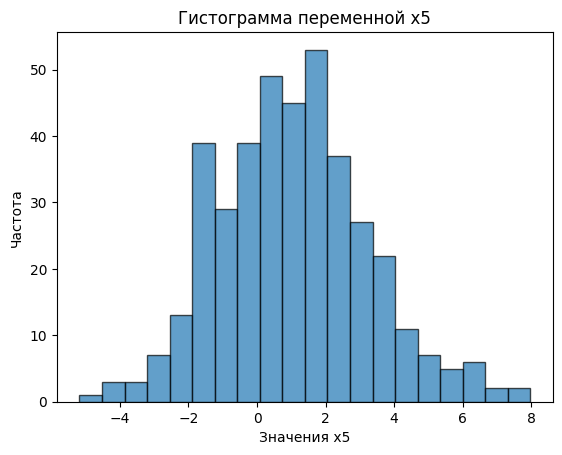

In [10]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

# Задайте параметры для случайной величины α
p_min = 0.2
p_max = 0.4

# Генерируем случайные значения α
n = len(data)
alpha = [random.uniform(p_min, p_max) for _ in range(n)]

# Преобразуем 'x1' и 'x2' в числовые массивы, если они не числового типа
data['x1'] = pd.to_numeric(data['x1'], errors='coerce')
data['x2'] = pd.to_numeric(data['x2'], errors='coerce')

# Инициализируем пустой список для хранения значений x5
x5_values = []

# Вычисляем x5 для каждой строки в DataFrame
for i, row in data.iterrows():
    x5 = alpha[i] * row['x1'] + (1 - alpha[i]) * row['x2']
    x5_values.append(x5)

# Добавляем x5 в DataFrame
data['x5'] = x5_values

# Оценка математического ожидания и дисперсии x5
mean_X5 = np.mean(data['x5'])
variance_X5 = np.var(data['x5'])

print("Математическое ожидание x5:", mean_X5)
print("Дисперсия x5:", variance_X5)

# Строим гистограмму для переменной x5
plt.hist(data['x5'], bins=20, edgecolor='k', alpha=0.7)
plt.xlabel('Значения x5')
plt.ylabel('Частота')
plt.title('Гистограмма переменной x5')
plt.show()
